<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы машинного обучения – Лабораторная работа №4

# Нейронные сети MLP

Лабораторная работа 4 – Вариант 9 

1. Набор данных: diamonds 

2. Независимые признаки: carat, depth 

3. Метка класса: color 

4. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32. 

Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.
 
Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных. 

Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.  

Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки. 

Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках. 

Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом. 

Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети.  

Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных. 

Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке. 
Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. 

Импортируем необходимые библиотеки:

__Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [50]:
ds = tfds.load("diamonds", split='train')



In [81]:
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Независимые признаки: carat, depth

Метка класса: color

In [82]:
df = df[['features/carat','features/depth','features/color']]
df.head()

,features/carat,features/depth,features/color
0,1.26,60.599998,4
1,0.80,62.099998,4
2,0.56,61.700001,2
3,1.51,64.000000,6
4,0.33,62.200001,5


__Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.__

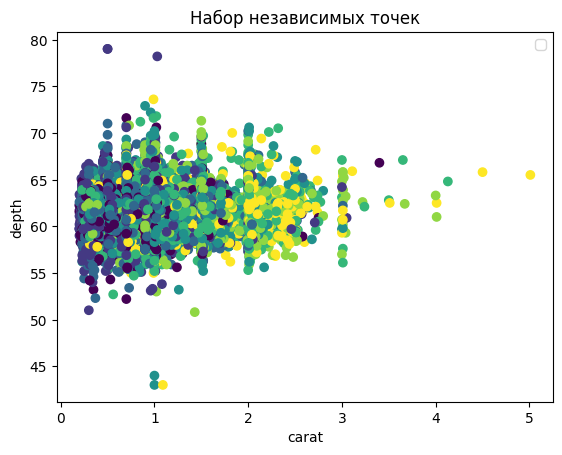

In [83]:
plt.scatter(df['features/carat'], df['features/depth'], c = df['features/color'])
plt.title('Набор независимых точек')
plt.xlabel('carat')
plt.ylabel('depth')
plt.legend()

__Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.__

In [84]:
class_mapping = {
    0:1,
    4: 0,  
    2: 0,
    6:0,
    5:0,
    3: 1,
    1:1
}

In [85]:
df['features/color']=df['features/color'].map(class_mapping)

<ipython-input-85-4f542afd0d27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features/color']=df['features/color'].map(class_mapping)


In [86]:
df['features/color'].unique()

array([0, 1])

In [87]:
len(df['features/color'])

53940

In [88]:
df['features/color'].value_counts()

1    27864
0    26076
Name: features/color, dtype: int64

почти 50 к 50


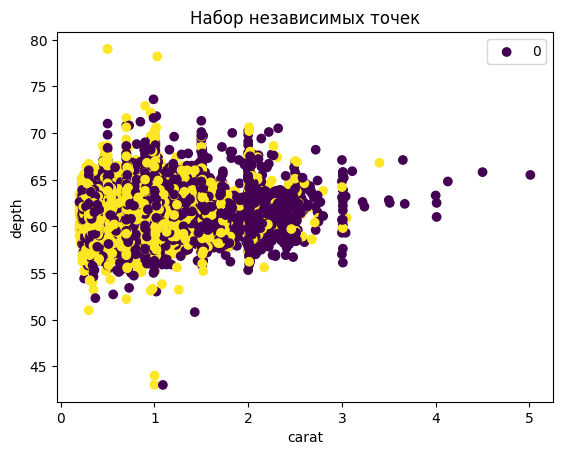

In [89]:
plt.scatter(df['features/carat'], df['features/depth'], c = df['features/color'])
plt.title('Набор независимых точек')
plt.xlabel('carat')
plt.ylabel('depth')
plt.legend(df['features/color'])

In [37]:
df['features/color'].value_counts()

0    53940
Name: features/color, dtype: int64

In [1]:
# !pip install -q tfds-nightly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

### Бинарная классификация при помощи TensorFlow

__Бинарная (двоичная) классификация__ (binary classification) — это задача классификации элементов заданного набора данных в два класса.

Создадим синтетический набор данных при помощи функции `make_circles`:


In [38]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)
X.shape, y.shape

((1000, 2), (1000,))

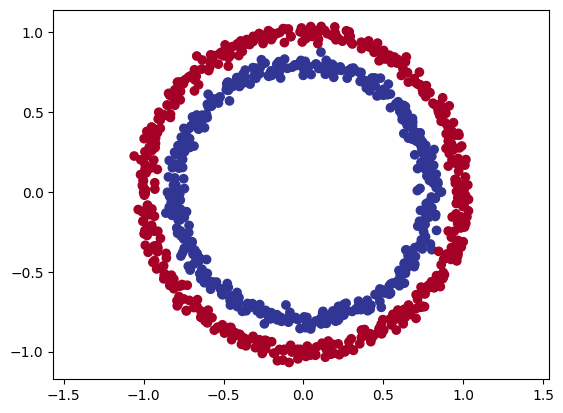

In [39]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)
plt.axis('equal');

Для визуализации областей принятия решения будем использовать следующую функцию (аналогичная функция определена в библиотеке `mlxtend`):

In [40]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()] 
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация 
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Рассмотрим нейронную сеть с одним слоем из одного нейрона и попробуем обучить ее бинарной классификации (для этого функция активации в выходном слое будет сигмоидой):

In [41]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid')])
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['accuracy'])
model_1.fit(X, y, epochs = 5);

Epoch 1/5
32/32 [==============================] - 18s 2ms/step - loss: 0.7431 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.4970
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5050


Нейронная сеть не обучается, а области принятия решения выглядят так:

313/313 [==============================] - 0s 1ms/step


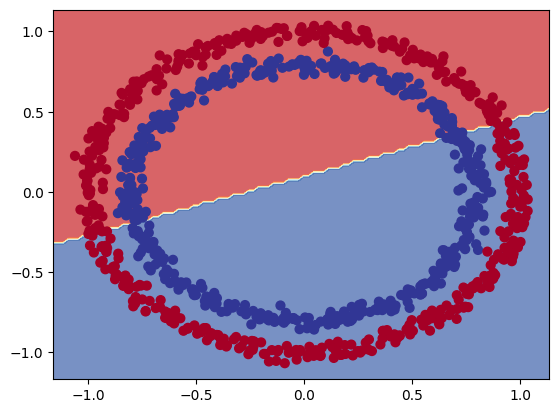

In [42]:
plot_decision_boundary(model_1, X, y)

Попробуем теперь использовать глубокую (многослойную) нейронную сеть с нелинейными функциями активации в скрытых слоях. Разобьем набор данных на обучающую и тестовую выборки: 

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['accuracy'])

In [ ]:
model_2.fit(X_train, y_train, epochs = 25, verbose = 0);

In [ ]:
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f'Потери модели на тестовой выборке: {loss}')
print(f'Доля верных ответов на тестовой выборке: {100*accuracy}')

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model_2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model_2, X=X_test, y=y_test)

### Важность признаков

Линейные алгоритмы машинного обучения строят модели, в которых прогноз представляет собой взвешенную сумму входных значений.

Примеры таких алгоритмов включают линейную регрессию, логистическую регрессию и их расширения, добавляющие регуляризацию, такие как гребневая регрессия и эластичная сеть.

Все эти алгоритмы находят набор коэффициентов для использования во взвешенной сумме, чтобы сделать прогноз. Эти же коэффициенты можно использовать в качестве предварительной оценки важности признаков.

Загрузим набор данных Ирисы:

In [ ]:
ds = tfds.load("iris", split='train')
df = tfds.as_dataframe(ds)
for i in range(4):
    df['V'+str(i)] = df['features'].apply([lambda x:x[i]])
df.drop(columns=['features'],inplace=True)
df.sample(5)

В наборе данных 150 записей, 4 независимых признака и метки классов:

In [ ]:
df.shape

В наборе данных отсутствуют пропущенные значения:

In [ ]:
df.isnull().sum()

Все столбцы числовые:

In [ ]:
df.dtypes

Сформируем массивы из признаков и меток класса:

In [ ]:
X = np.array(df.drop('label', axis=1))
y = np.array(df['label'])

Оставим точки первых двух классов:

In [ ]:
X = X[ y<2 ]
y = y[ y<2 ]

Создадим и адаптируем слой нормализации для всех признаков:

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X)

Построим нейронную сеть с одним выходным нейроном с функцией активации сигмоида для решения задачи логистической регрессии:

In [ ]:
model_aux = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_aux.summary()

Скомпилируем и обучим модель:

In [ ]:
model_aux.compile(loss=tf.keras.losses.binary_crossentropy)
model_aux.fit(X, y, epochs=1000, verbose=0);

Посмотрим на значения весов в выходном слое:

In [ ]:
model_aux.layers[1].kernel

Веса в слое после обучения нейронной сети имеют значения, зависящие от случайных начальных значений, поэтому, вообще говоря, нужно строить несколько моделей и усреднять результаты.

Более высокие значения весов (по абсолютному значению) чаще всего означают более высокую важность признаков.

Таким образом, для определения важности признаков набора данных для бинарной классификации можно решать вспомогательную задачу построения и обучения нейронной сети для логистической регрессии.

### Задача класссификации

Пусть имеется множество объектов, характеризующихся признаками и разделённых некоторым образом на классы.

__Задача классификации__ — это задача построения алгоритма (функции), способного классифицировать произвольный объект из исходного пространства признаков, т.е. определять метку класса для этого объекта.

__Бинарная (двоичная) классификация__ (binary classification) — это задача классификации элементов заданного набора данных в два класса.

Для бинарной классификации могут применяться методы многоклассовой классификации, а также ряд специализированных методов, например, логистическая регрессия.

Задача классификации ирисов не является задачей бинарной классификации. Чтобы получить бинарную классификацию, оставим в наборе данных два первых класса ирисов.

In [ ]:
X = X[y<2,:2]
y = y[y<2]
X.shape, y.shape

Для разбиения набора данных на обучающую и тестовую выборки будем использовать функцию `train_test_split`:

In [ ]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_ratio=0.2, seed=42
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Глубокая нейронная сеть для задачи бинарной классификации

Так как признаки набора имеют разные диапазоны изменения, используем слой нормализации, адаптированный ко всем независимым признакам:

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X_train)

Создадим нейронную сеть со слоем нормализации, тремя скрытыми плотными слоями с 64  нейронами и функцией активации ReLu и выходным слоем из одного нейрона с функцией активации сигмоида:

In [ ]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Используем в качестве функции потерь при работе с задачами бинарной классификации `binary_crossentropy`. В ходе обучения будем отслеживать показатель аккуратности (accuracy):

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=3)

### Визуализация обучения модели 

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [ ]:
plt.plot(np.arange(1, 4), history.history['loss'], label='Потери')
plt.plot(np.arange(1, 4), history.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

### Прогнозирование при помощи модели

При помощи обученной нейронной сети получаем на выходе значения, которые можно интерпретировать как вероятности:


In [ ]:
prediction = model.predict(X_test)
prediction

Эти вероятности можно преобразовать в прогнозируемые классы следующим образом (использовано пороговое значение 0.5):

In [ ]:
y_pred = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction)])
print(y_pred)

Оценка модели на тестовой выборке выглядит так:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

### Визуализация границы решения

Граница решения для построенного классификатора:

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model, X=X_test, y=y_test)

### Показатели качества бинарной классификации

Когда имеется всего два класса, то будем называть класс $c_{1}$ положительным классом, а класс $c_{2}$ отрицательным классом. Тогда матрица ошибок (confusion matrix) принимает вид:

$$\left(\begin{array}{cc}
TP & FN\\
FP & TN
\end{array}\right),$$

где 
* $TP$ – (True Positives) – число корректно спрогнозированных точек в классе $c_{1}$ 
* $FN$ – (False Negatives) – число точек в классе $c_{1}$, ошибочно спрогнозированных в класс $c_{2}$
* $FP$ – (False Positives) – число точек в классе $c_{2}$, ошибочно спрогнозированных в класс $c_{1}$
* $TN$ – (True Negatives) – число корректно спрогнозированных точек в классе $c_{2}$ 

Показатели $TN$, $FP$, $FN$ и $TP$ могут быть реализованы так:

In [ ]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

In [ ]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

In [ ]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

In [ ]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

Матрица ошибок для бинарной классификации определяется так:

In [ ]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TP(y_true, y_predict), FN(y_true, y_predict)],
        [FP(y_true, y_predict), TN(y_true, y_predict)]
    ])

In [ ]:
confusion_matrix(y_test, y_pred)

Наряду с показателями $TP, TN, FP, FN$ могут быть вычислены показатели $TPR=\frac{TP}{TP+FN}$ (доля корректно спрогнозированных положительных точек) и $FPR=\frac{FP}{FP+TN}$ (доля ошибочно  спрогнозированных положительных точек):


In [ ]:
def tpr_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0

def fpr_score(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try:
        return fp / (fp + tn)
    except:
        return 0.0

In [ ]:
tpr_score(y_test, y_pred), fpr_score(y_test, y_pred)

### ROC-анализ

ROC-анализ (Receiver Operating Characteristic) – это популярная стратегия оценки производительности бинарных классификаторов. Для ROC-анализа нужен не только прогноз меток класса, но и значения т.н. скоринговой функции для каждой точки в тестовом наборе. В качестве значений скоринговой функции можно взять вероятности, возвращаемые нейронной сетью:

In [ ]:
prediction = model.predict(X)
prediction.shape

Пусть $S\left(\mathbf{\overline{x}}_{i}\right)$ – это значение скоринговой функции для точки $\mathbf{\overline{x}}_{i}$ и пусть минимальное и максимальное значения скоринговой функции на наборе данных $\mathbf{D}$ равны $\rho^{min}=\min_{i}S\left(\mathbf{\overline{x}}_{i}\right)$, $\,\rho^{max}=\max_{i}S\left(\mathbf{\overline{x}}_{i}\right)$.

Скоринговая функция применяется для бинарной классификации точек набора данных следующим образом: выбирается некоторый порог отсечения (threshold) и если скоринговая функция принимает на точке значение выше порога отсечения, то точка классифицируется как положительная, иначе, как отрицательная. Далее для каждого значения $\rho\in\left[\rho^{min},\rho^{max}\right]$ определяем множество положительных точек $\mathbf{R_{1}}\left(\rho\right)=\left\{ \mathbf{\overline{x}}_{i}\in\mathbf{D}:S\left(\mathbf{\overline{x}}_{i}\right)>\rho\right\}$  и вычисляем показатели $TPR$ и $FPR$, чтобы получить новую точку на ROC кривой. 

Показатель $FPR$ откладывается вдоль оси x, а показатель $TPR$ – вдоль оси y. В результате получаем ROC кривую (кривую Лоренца).


In [ ]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [ ]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

In [ ]:
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prediction.reshape(-1),y,partitions=50)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

В случае идеального бинарного классификатора верхней левой точкой ROC кривой является точка $\left(0,\,1\right)$, соответствующая значениям $FPR=0$ и $TPR=1$, т.е. у классификатора нет ложно положительных точек и правильно классифицированы все положительные точки (отсюда вытекает, что правильно классифицированы и все отрицательные точки). 

Таким образом, ROC-кривая показывает, в какой степени классификатор дает более высокую оценку положительным точкам по сравнению с отрицательными точками. Идеальный классификатор оценивает все положительные точки выше, чем отрицательные. Таким образом, чем ближе ROC кривая к идеальному случаю, тем лучше классификатор. 

Площадь под ROC кривой, обозначаемая $AUC$, может быть использована как мера качества классификатора. Так как общая площадь квадрата равна $1$, показатель $AUC$ находится в интервале $\left[0,\,1\right]$ (чем больше, тем лучше). 

Для вычисления площади под кривой можно использовать метод трапеций или иной численный метод

### Глубокая нейронная сеть для задачи многоклассовой классификации

Вернемся к исходному набору данных Ирисы:

In [ ]:
df = tfds.as_dataframe(ds)
for i in range(4):
    df['V'+str(i)] = df['features'].apply([lambda x:x[i]])
df.drop(columns=['features'],inplace=True)
df.sample(5)

In [ ]:
X = np.array(df.drop('label', axis=1))
y = np.array(df['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_ratio=0.2, seed=42
)

In [ ]:
y_train.shape, y_test.shape

In [ ]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [ ]:
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)
y_train.shape, y_test.shape

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X_train)

In [ ]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    # уровень выводимой информации
                    verbose=1,
                    # проверка (валидация) на 20% обучающих данных
                    validation_split = 0.2)

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();

### Создание бинарного набора данных

Загрузим набор данных с информацией о качестве вина на основе физико-химических тестов.

In [ ]:
ds = tfds.load("wine_quality", split='train')
df = tfds.as_dataframe(ds)
df.sample(5)

Оставим в наборе данных два независимых признака `features/density` и `features/alcohol` и метки классов `quality`,  убрав из названий признаков строку `features/`:

In [ ]:
df = df[['features/density','features/alcohol','quality']]
df.columns = ['density','alcohol','quality']
df.head()

Оценим количество записей с различными значениями признака `quality`:

In [ ]:
df['quality'].unique()

In [ ]:
df['quality'].value_counts().sort_index()

Объявим винами высшего качества вина с индексом качестве более или равным 6:

In [ ]:
df['top'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop('quality', axis=1, inplace=True)

df.head()

### Если нейронная сеть не обучается...

* Проверить отсутствие ошибок в коде – могут быть ошибки, которые не создают исключений, но не дают нейронной сети обучиться
* Проверить, что нейронная сеть формирует выход на каких-нибудь тестовых данных. Убедиться, что на других тестовых данных выход будет отличаться.
* Проверьте, что входные данные нормализованы
* Поработайте с набором данных – уберите выбросы, попробуйте обучить сеть не на всем наборе, а на случайной выборке
* Измените параметры обучения – поменяйте оптимизатор, начальный шаг обучения и т.п.
* Измените способ начальной инициализации весов в скрытых слоях, например:
`kernel_initializer='he_normal'`
* Измените параметры (в т.ч. по умолчанию) в методе `fit()`, например, количество эпох, размер пакета `batch_size` и пр.


#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.

2.	Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

3.	Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. 

4.	Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.

5.	Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.

6.	Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.

7.	Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети. 

8.	Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

9.	Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.

10.	Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.
